### Звериный бутстреп

Скачайте из чата архив `animals.zip`, разархивируйте его и положите рядом с этим ноутбуком (иначе придется менять пути файлов). Если у вас не установлена библиотека `skimage` это можно сделать раскомменировав соответствующую команду следующей ячейки.

In [1]:
# Установка библиотеки
# ! pip install scikit-image

Готово! Теперь можно начинать работу над заданием.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from skimage.transform import resize

Имеются картинки пяти зверюшек, это наша выборка. Нужно оценить дисперсию среднего значения зверей. Для каждого пикселя картинки и для каждого цветового канала все операции проводим отдельно. 

Загружаем картинки зверюшек и приводим их к размеру 500 на 500. Каждая картинка представляется в виде трехмерной матрицы размера (500, 500, 3) чисел от 0 до 1. Первые две размерности отвечают за высоту и ширину картинки, третья за цветовые каналы --- красный, зеленый, синий.

По сути у нас есть выборка размера 5 из $(500\cdot500\cdot3)$-мерного пространства.

In [3]:
n = 5
images = [plt.imread('animals/animal_{}.jpg'.format(i+1)) for i in range (n)]
images = [resize(images[i], (500, 500, 3)) for i in range (n)]

Визуализируем все изображения при помощи функции `plt.imshow`. Вызов функций `plt.xticks([]), plt.yticks([])` убирает подписи к координатным осям, `plt.tight_layout`  обрезает пустые поля графиков, а `facecolor=(0,0,0,0)` делает фон графика прозрачным при сохранении (четыре числа -- красный, зеленый, синий, прозрачность).

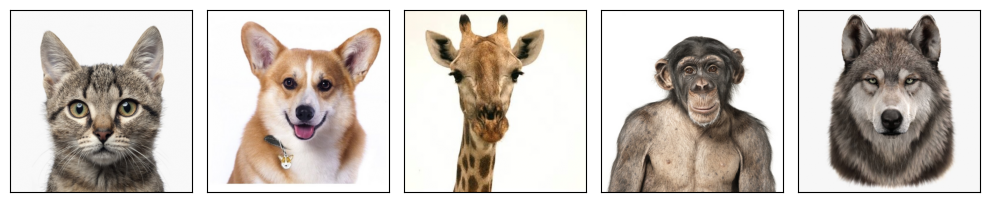

In [4]:
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.savefig('zoo.png', facecolor=(0,0,0,0))
plt.show()

Для визуализации загрузим изображение стрелки

In [5]:
arrow = plt.imread('animals/arrow.png')

Функция, реализующая бутстреп

In [6]:
def zoo_bootstrap(images, B=6, draw=False):
    '''
    Генерирует B бутстрепных выборок изображений 
    и возвращает среднее по каждой из них. 
    Если указан параметр draw, то рисует процесс на графике.
    '''
    # размер выборки
    n = len(images)
    # средние по бутстрепным выборкам
    bootstrap_means = []  
    
    if draw:
        plt.figure(figsize=(11.5, 9.5))

    for b in range(B):
        # сумма элементов в бутстрепной выборке
        sum_bsample = 0

        for i in range(n):
            # генерируем элемент бутстрепной выборки
            ind = np.random.randint(0, n)
            # добавляем его к сумме по этой выборке
            sum_bsample += images[ind]

            # визуализация элемента бутстрепной выборки
            if draw:
                plt.subplot(B, n+2, b*(n+2)+i+1)
                plt.imshow(images[ind])
                plt.xticks([]), plt.yticks([])
                if i == 0:
                    plt.ylabel('$X^*_{}$:       '.format(b+1), 
                               rotation=0, fontsize=26)
        
        # добавляем среднее по бутстрепной выборке
        current_mean = sum_bsample / n
        bootstrap_means.append(current_mean)

        if draw:
            # стрелка
            plt.subplot(B, n+2, b*(n+2)+i+2)
            plt.imshow(arrow)
            plt.axis('off'), plt.xticks([]), plt.yticks([])
            # среднее по бутстрепной выборке
            plt.subplot(B, n+2, b*(n+2)+i+3)
            plt.imshow(bootstrap_means[-1])
            plt.xticks([]), plt.yticks([])
            
    if draw:
        plt.tight_layout()
        plt.savefig('animals/zoo_bootstrap.png', facecolor=(0,0,0,0))
        plt.show()
    
    return bootstrap_means

Посмотрим, что получается на выборках размера 6. Ниже изображена схема бутстрепа. По строкам изображены бутстрепные выборки (разумеется, размера 5). В последнем столбце по каждой бутстрепной выборке посчитано среднее всех пикселей.

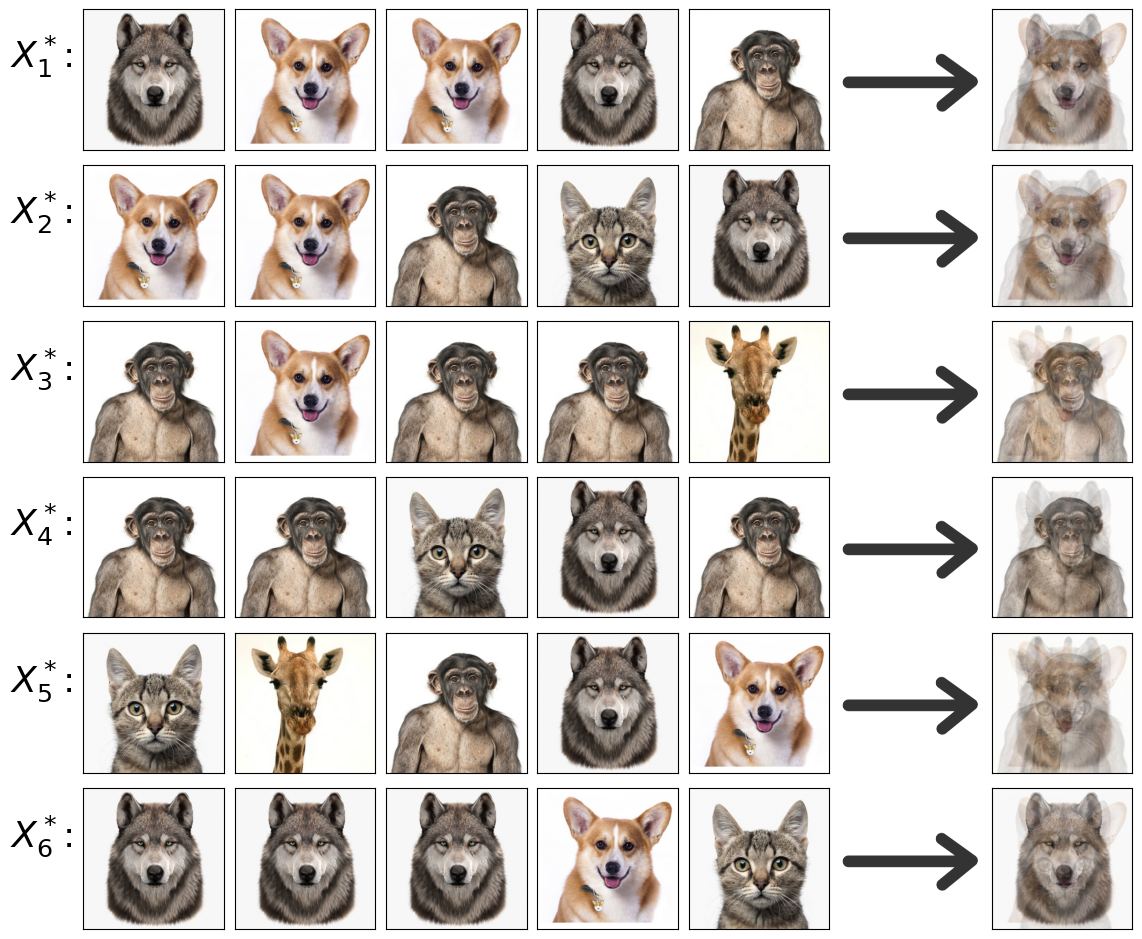

In [7]:
bootstrap_means = zoo_bootstrap(images, draw=True)

По бутстрепной выборке средних (правый столбец выше) можем посчитать выборочную дисперсию для каждого пикселя. Поскольку цвета изображения должны быть от 0 до 1, для визуализации нормируем все дисперсии на максимальное значение по всем пикселям и цветовым каналам. Очевидно, что минимальное значение дисперсий равно нулю --- в крайних пикселях всегда белый фон.

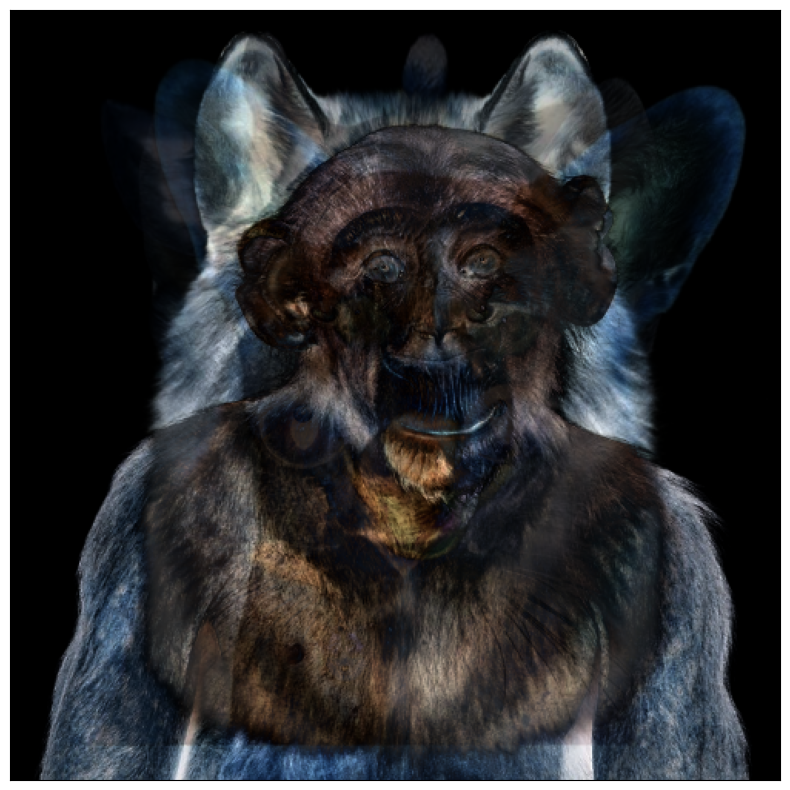

In [8]:
bootstrap_var = np.var(bootstrap_means, axis=0, ddof=0)
bvar_normed = bootstrap_var / bootstrap_var.max(axis=(0, 1)).reshape((1, 1, 3))

plt.figure(figsize=(10, 10))
plt.imshow(bvar_normed)
plt.xticks([]), plt.yticks([]);
plt.savefig('animals/zoo_bootstrap_var.png', facecolor=(0,0,0,0))
plt.show()

Посмотрим на результат при большем количестве бутстрепных выборок

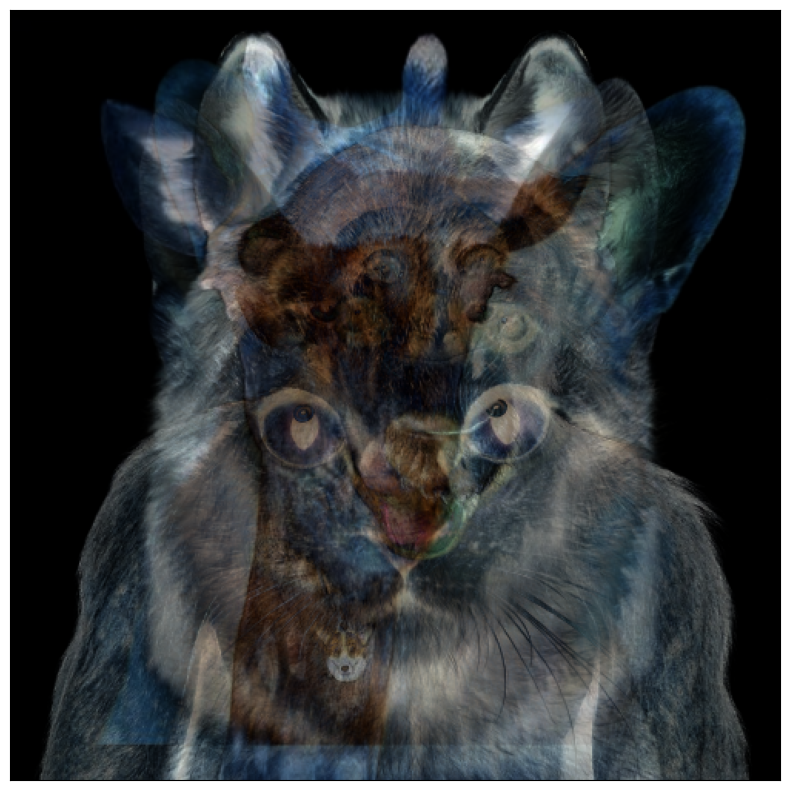

In [9]:
bootstrap_means = zoo_bootstrap(images, B=300)
bootstrap_var = np.var(bootstrap_means, axis=0, ddof=0)
bvar_normed = bootstrap_var / bootstrap_var.max(axis=(0, 1)).reshape((1, 1, 3))

plt.figure(figsize=(10, 10))
plt.imshow(bvar_normed)
plt.xticks([]), plt.yticks([]);
plt.savefig('animals/zoo_bootstrap_var.png', facecolor=(0,0,0,0))
plt.show()

------

Никита Волков

https://mipt-stats.gitlab.io/